In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation


%matplotlib inline

# 0. Together

## Sklearn
Sklearn has a really consistent and elegant workflow for almost all the predictive models they have. 

1. Separate your data into X (predictors) and y (outcome), and maybe do some model validation set up.
2. Create an Empty Model.
3. call `.fit()` using your training data
4. call `.predict()` on ANY X data to get the model prediction for that data.
5. call `.score()` to calculate the default model performance metric (but you can also specify which metric you want to use by using specific functions like `mean_squared_error()`), using the true outcomes and the  predicted values from your model.

This workflow is relatively consistent throughout all the supervised/predictive models we learn (you may even recognize `.fit()` from `StandardScaler()`!

## Linear Regression
Remember that *linear* regression fits straight lines (or flat planes/hyperplanes with multiple predictors) using the formula $Y = mx + b$. If the relationship between the predictor and the outcome is not linear, then the model may not perform well. And more importantly, it will likely perform badly SPECIFICALLY for certain ranges of values. Think about an example where it might be especially problematic for our model to be worse at predicting (and/or consistently under or over predicts) for certain ranges of predictors?

## What IS non-linear?

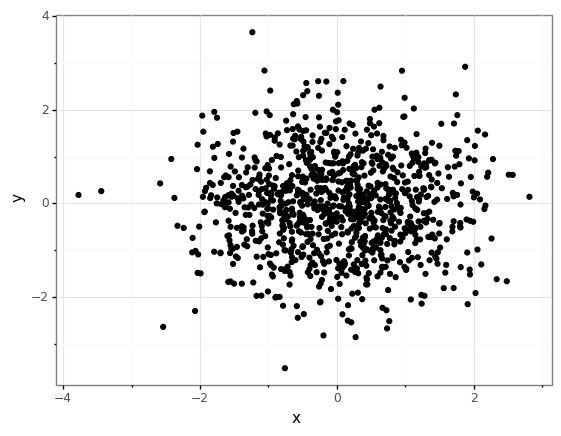

<ggplot: (8781585602967)>

In [14]:
# no relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*0 + np.random.normal(loc = 0, scale = 1, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw())

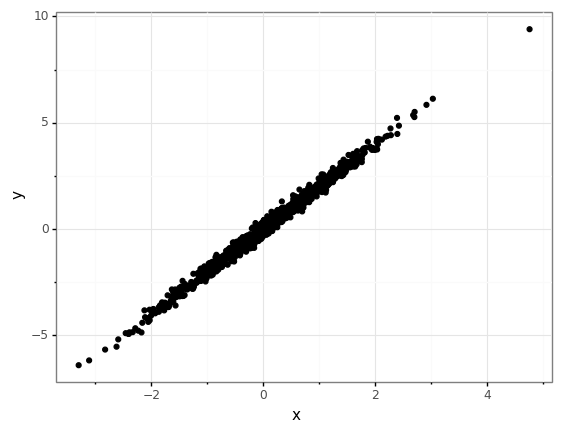

<ggplot: (8781585809815)>

In [15]:
# strong relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*2 + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw())

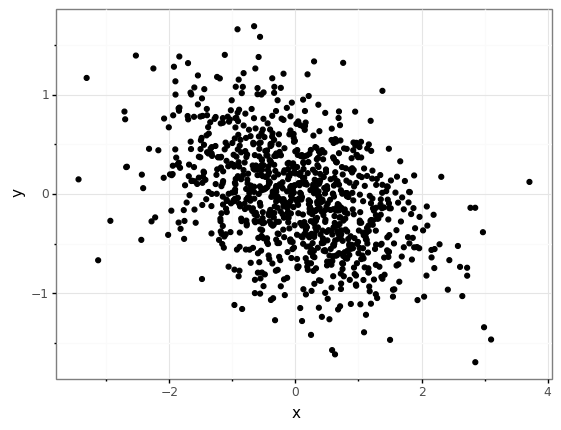

<ggplot: (8781586130143)>

In [16]:
# weaker relationship but linear
x = np.random.normal(loc = 0, scale = 1, size = 1000)
y = x*-0.25 + np.random.normal(loc = 0, scale = 0.5, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw())

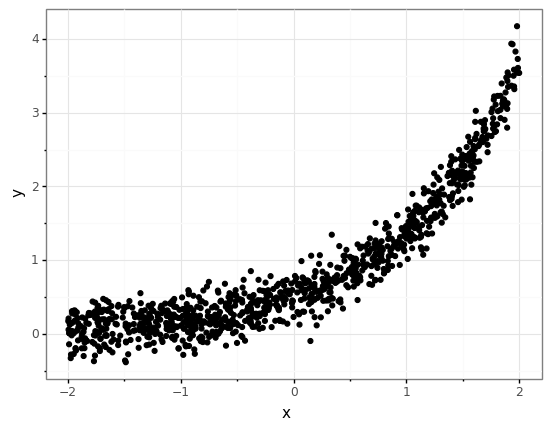

<ggplot: (8781586238296)>

In [17]:
# strong relationship but NONlinear
x = np.random.uniform(low = -2, high = 2, size = 1000)
y = np.exp(x)*0.5 + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x": x,
                  "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw())

# 1. Simulating Data

In the following code block, I'm creating FAKE data in order to demonstrate how linear regression works. You won't be tested on how to write this kind of code directly (if you ever need to write it yourself, you'll be able to look it up and ask for help) but try to see if you understand what's going on.

Each time you use a np.random.XXXX function, you'll get *different* fake data, because it's randomly generated. Try it out! If you want your data to come out the SAME each time, add the line `np.random.seed(XXXX)` at the top of the next cell, where `XXXX` is any integer you want like 42, 8675309, or 1234.

## 1.1 Linear Regression Data Generation

In [ ]:
# set population values for Cat length
np.random.seed(8675309)

# mean cat length in cm
mean_length_cm = 170

# standard deviation of cat length in cm
sd_length_cm = 15

# number of samples
n = 100

# generate random data for cat length that follows a normal distribution
length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)

In [ ]:
# plot cat length data----
(ggplot(pd.DataFrame({"length": length}),
       aes(x = "length")) +
geom_histogram(color = "black") + 
theme_minimal())

In [ ]:
# Set TRUE relationship between cat length and cat weight----
# true relationship between cat length and cat weight?
# i.e. As length increases by 1 cm, how much do we expect weight to increase?
true_coef = 0.04

# intercept: the expected weight of a cat that is 0 cm (doesn't make sense but that's math for you)
intercept = 0.2

In [ ]:
# generate cat weights using list comprehension----

weight = intercept + length*true_coef + np.random.normal(0,1,n) # weight = intercept + length*coefficient + random error

In [ ]:
# plot cat weight data as a histogram----
##############################################

##############################################

In [ ]:
# plot cat weight by cat length----
##############################################

##############################################

## 1.2 Fitting a Regression Model

In [ ]:
cats = pd.DataFrame({"length": length, "weight": weight})

features = ["length"]
X = cats[features]
y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error


##############################################
# run a linear regression
lr =  ## create a linear regression model

# fit the linear regression model using X and y
##############################################

In [ ]:
# grab the coefficients from the model and store them in a data frame----

coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
coef = coef.append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
coef

The coefficient of length is 0.034702, and the intercept is 1.056641. The coefficient of length indicates that as length increases by 1 cm, we expect weight to increase by 0.035 kg.

### *Question*

Compare that to the TRUE population values we set above (hint: print `trueCoef` and `intercept`). How close are the numbers from *this* linear regression to the true values? What do you think will happen if we created another random sample? 100 random samples?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [ ]:
### YOUR CODE HERE ###

 ### YOUR ANSWERS HERE ###

# 2. Fitting Linear Regressions on Multiple Datasets

In [ ]:
def linearRegression(n = 100, trueCoef = 0.04, intercept = 0.2, error_sd = 1):
    
    # mean cat length in cm
    mean_length_cm = 170
    # standard deviation of cat length in cm
    sd_length_cm = 15
    
    # generate random data for cat length that follows a normal distribution
    length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)
    weight = intercept + length*true_coef + np.random.normal(0,error_sd,n)
    # weight = intercept + length*coefficient + random error
    
    cats = pd.DataFrame({"length": length, "weight": weight})

    features = ["length"]
    X = cats[features]
    y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error

    ##############################################
    # run a linear regression
    lr = pass

    # fit the linear regression
    
    ##############################################
    
 
    
    # grab the coefficients from the model and store them in a data frame
    coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
    coef = coef.append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
    return({"coef": coef, "data": cats})
    

In [ ]:
#run regression simulation 500 times
iWouldRun500Regressions = [linearRegression(n = 100, trueCoef = 0.04, intercept = 0.2) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df = pd.concat([x["coef"] for x in iWouldRun500Regressions])

# grab coefficients from 500 simulations
data_df = pd.concat([x["data"] for x in iWouldRun500Regressions])

# number simulations 0:499
data_df["simulation_no"] = sorted(list(range(0,500))*n)
coef_df["simulation_no"] = sorted(list(range(0,500))*2)

## 2.1 Let's Explore!

Now that we've run a bunch of simulations with the SAME true coefficient and intercept (but different random samples), let's look at the results of our 500 regression models.


First, let's just make some scatter plots to see some of the simulations. Notice how similar or different the simulations are from each other.

In [ ]:
n_plot = 9

chosen_datasets = data_df["simulation_no"] < 9

(ggplot(data_df.loc[chosen_datasets], aes(x = "length", y = "weight", color = "factor(simulation_no)")) +
geom_point() +
facet_wrap("~simulation_no") +
theme_minimal() +
labs(color = "Simulation Number"))

Let's look at the coefficient values from all the linear regressions we ran.

In [ ]:
# plot legnth coef values and mean length coef value (red line)----
coef_only = coef_df["Names"] == "length"


(ggplot(coef_df.loc[coef_only], aes(x = "Coef")) + 
geom_histogram(color = "black") +
geom_vline(xintercept = coef_df.loc[coef_only, "Coef"].mean(), color = "red", linetype = "dashed", size = 2) +
labs(title = "Length Coefficient Values Across 500 Simulations") +
theme_minimal())

In [ ]:
print("The mean coefficient for length across the 500 simulations is: " + str(coef_df.loc[coef_only, "Coef"].mean()))

### *Question*

Look at the different values you got for the coefficient of length. We set the TRUE coefficient value to be 0.04, think about and describe how spread apart the estimates from our 500 regression models are. Does seeing how different our coefficient estimates can be *change* how you think about the coefficient estimates you get in regression models on real data?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

### YOUR ANSWER HERE ###

# 3. Fitting MORE Linear Regressions on Multiple Datasets

This is your chance to play around with the different values in our simulation. Play around with these values to get a better understanding of how different values effect our linear regression output.

### *Question*
Here are some suggestions:

* Change `n`, the number of data points in each sample, to be very small (say 10), how does this change the results you saw?
* Change `n`, the number of data points in each sample, to be very large (say 1,000), how does this change the results you saw?
* Change the `error_sd` term, this is a measure of how much error is in the model. More error means that data is scattered tightly around the regression line, less error means that the data is scatters very loosely around the regression line. How does changing  `error_sd` change the results you originally saw?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [ ]:
#run regression simulation 500 times----

#--- play around with these numbers-------
n = 100
trueCoef = 0.04
intercept = intercept
error_sd = 1
#-----------------------------------------

iWouldRun500More = [linearRegression(n = n, trueCoef = trueCoef, intercept = intercept, error_sd = error_sd) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df2 = pd.concat([x["coef"] for x in iWouldRun500More])

# grab coefficients from 500 simulations
data_df2 = pd.concat([x["data"] for x in iWouldRun500More])

# number simulations 0:499
data_df2["simulation_no"] = sorted(list(range(0,500))*n)
coef_df2["simulation_no"] = sorted(list(range(0,500))*2)

In [ ]:
# plot a few of the simulated data ----

### YOUR CODE HERE ###

In [ ]:
# plot the coefficients and EXPLORE! ----

### YOUR CODE HERE ###

### YOUR REFLECTIONS HERE ###

### *Question*
In prediction models, we often care most about the *accuracy* of the model. In Linear Regression we often measure that using the mean squared error. Using the `mean_squared_error()` function from sklean, and the other code in this notebook as an example, change the function `linearRegression()` below to calculate and store the mean squared error for each regression in a new dataframe, `mse`, and add it to the dictionary that the function returns. Then run the function 500 times, and plot a histogram of the mean squared errors. 

What does this histogram tell you about the accuracy of our models?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [ ]:
def linearRegression(n = 100, trueCoef = 0.04, intercept = 0.2, error_sd = 1):
    
    # mean cat length in cm
    mean_length_cm = 170
    # standard deviation of cat length in cm
    sd_length_cm = 15
    
    # generate random data for cat length that follows a normal distribution
    length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)
    
    # weight = intercept + length*coefficient + random error
    weight = intercept + length*true_coef + np.random.normal(0,error_sd,n)
    
    
    cats = pd.DataFrame({"length": length, "weight": weight})
    

    features = ["length"]
    X = cats[features]
    y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error

    ##############################################
    # run a linear regression
    lr = pass

    # fit the model

    ##############################################
    
    ##### ADD MSE CODE HERE ######
    mse = pass
    ###############################

    # grab the coefficients from the model and store them in a data frame
    coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
    coef = coef.append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
    
    ##############################################
    return({"coef": coef, "data": cats, "mse": pass}) ##### DON'T FORGET to add the new mse data frame too! #####
    ##############################################

In [ ]:
# Run your new simulations-----

iWouldRun500More2 = [linearRegression(n = n, trueCoef = trueCoef, intercept = intercept, error_sd = error_sd) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df3 = pd.concat([x["coef"] for x in iWouldRun500More2])

# grab coefficients from 500 simulations
data_df3 = pd.concat([x["data"] for x in iWouldRun500More2])

# grab mse from 500 simulations
mse_df3 = pd.concat([x["mse"] for x in iWouldRun500More2])

# number simulations 0:499
data_df3["simulation_no"] = sorted(list(range(0,500))*n)
coef_df3["simulation_no"] = sorted(list(range(0,500))*2)
mses_df3["simulation_no"] = list(range(0,500))

In [ ]:
# plot newly calculated mses ----

# 4. Interpreting Linear Regression Coefficients

While sometimes we just want the predictions from a linear regression model, we often will be asked to interpret the coefficients as well.

Use the table of coefficients you create below to answer the following questions.

### *Question*

* Do you think the assumption of linearity is valid for this model?
* How will a 1 oz increase in weight change the predicted value for Amazon Price?
* What does the intercept represent?
* Using the values from the coefficient table, predict the Amazon Price for a book that has a list price of 15.99, a Weight of 4 oz, and 428 pages. Show your work using code.
* If we took another random sample of Amazon books from the same population, how do you expect the coefficients from the model would/could change?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>

In [ ]:
d = pd.read_table("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt")
predictors = ["List Price", "Weight (oz)", "NumPages"]
outcome = ["Amazon Price"]
##############################################

#get rid of missing values


# z score predictors


# create regression


# fit model


##############################################


In [ ]:
##############################################
# print out table of coefficients

##############################################


# BONUS (Optional). Violations of Linearity

For some Optional data exploration, use the first cell (#nonLinReg) to simulate a dataset where the relationship between the predictor and the outcome are non-linear, meaning they violate the assumption of linearity. Use the second cell (#LinReg) to simulate a dataset where the relationship between the predictor and the outcome are linear. For both, create plots of 1) the predictor vs the outcome, 2) the predicted values vs the error and 3) a histogram of the errors.

### *Question*

* Compare patterns you see in the data that does *not* violate the assumption of linearity vs. the data that does. What's different?

* What are some consequenses of violating the assumption of linearity?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>

In [ ]:
#nonLinReg----------
x = np.random.uniform(low = -2, high = 2, size = 100)
y = 2 + np.exp(x) + np.random.normal(0,1,100)
# y = 2 + exp(x) + random error

df = pd.DataFrame({"x": x, "y": y})


# regression model
x = x.reshape(-1,1) #have to do this if there's only 1 predictor in the model

nlr = LinearRegression()
nlr.fit(x,y)

pred = nlr.predict(x)

df["pred"] = pred #add to df

df["error"] = y - pred


In [ ]:
#LinReg----------
x2 = np.random.uniform(low = -2, high = 2, size = 100)
y2 = 2 + 4.5*x2 + np.random.normal(0,1,100)

# y = 2 + 4.5x + random error

df2 = pd.DataFrame({"x": x2, "y": y2})


# regression model
x2 = x2.reshape(-1,1) #have to do this if there's only 1 predictor in the model

lr2 = LinearRegression()
lr2.fit(x2,y2)

pred2 = lr2.predict(x2)

df2["pred"] = pred2 #add to df

df2["error"] = y2 - pred2


In [ ]:
##############################################




##############################################